<a href="https://colab.research.google.com/github/daveking63/Jupyter-iPython-Notebooks-Deep-Learning-Notes/blob/master/tf_2_tfKeras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes from Jason Brownlee's
## TensorFlow 2 Tutorial: Get Started in Deep Learning with tf.keras

### What are Keras and tf.keras

Keras is an open-source deep learning library in Python.  Started in 2015 by Francois Chollet. In 2019 Google released a new version of TensorFlow that directly integrated the Keras API. This integration is usually referred to as the tf.keras interface.

In using TensorFlow and Keras to build, train and test a deep learning model, the first step is to import them.

In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

2.2.0-rc3
2.3.0-tf


### 5-Step Model Life Cycle


Once imported, you can start the 5-Step Model Life-Cycle that includes the following:

<ol>
<li>Define the Model - select the type and choose the architecture or network typology (using either the Sequential or Functional API.</li>
<li>Compile the Model -- select a loss function, optimization procedure, and sometimes performance metric(s), then compile the model using the chosen configuration.</li>
<li>Fit the Model - select the training configuration (epochs and batch size), then call a  function to perform the process.</li>
<li>Evaluate the Model - using a testing dataset, call a function to determine the loss or other metrics.</li>
<li>Use the Model to Make Predictions -- using new data, call a function to predict a class label, probability, or numerical value (depending on the problem of interest).</li>
</ol>

To illustrate we'll first consider a simple Sequential Model.

**Sequential Model API (Simple)**

Called 'sequential' because involves defining a Sequential Class and adding layers to the model one by one in a linear manner from input to output.

Here, were creating a Sequential MLP model with 8 inputs, one hidden layer with 10 notes, then an output layer with one node to predict a numerical value.

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define the model

model = Sequential()
model.add(Dense(10,input_shape=(8,)))
model.add(Dense(1))

### Functional Model API (Advanced)

More complex and flexible, involving the connection of the output layer to the input of another layer. First, we define the input class. Next, we connect one or more fully connected layers to the input, then finally the output layer.


In [0]:
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
model = Model(inputs=x_in, outputs=x_out)

### How to Develop Deep Learning Models

**Develop Multilayer Perceptron Models (MLP)**

Standard neural network model with layers of nodes where each node is connected to all the outputs from previous layer and the output of each node is connected to all inputs for nodes in the next layer.

MLPs are created using one or more Dense Layers.  It is appropriate for tabular data where each column is a variable and each row is an entity or sample. With MLP there are 3 predictive modeling programs of interest: binary classification, multiclass classification and regression.

**MLP for Binary Classification**

Focus on the *Ionosphere* binary (two-class) classification dataset which predicts whether a structure is in the atmosphere or not given radar returns.

We'll use a LabelEncoder to encode string labels to integer values of 0 or 1. Then fit the model 67% of the data for training, and 33% for evaluation. We'll employ the 'relu' activation function.


In [0]:
# import key libraries

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [5]:
# load dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)

print(X.shape)
print(y.shape)


(351, 34)
(351,)


In [6]:
# split into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

(235, 34) (116, 34) (235,) (116,)


In [0]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [10]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.888


In [11]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 0.994


**MLP for Multiclass Classification**

Predicting the species of iris flower given measurements of the flower. Uses the well-known iris dataset. Here, model will have one node for each class in the output layer and use the softmax activation function. The loss function is 'sparse_categorical_crossentropy' which is used for integer encoded class labels.


In [0]:
# import libraries

from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = LabelEncoder().fit_transform(y)


In [14]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

(100, 4) (50, 4) (100,) (50,)


In [0]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [18]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [19]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[9.785259e-01 2.052212e-02 9.520305e-04]] (class=0)


MLP for Regression

Like earlier source, uses Boston Housing dataset to predict a single numerical value - house value based on properties of the house and neighborhood. Ergo, the output has a single node and uses the default or linear activation function. The MSE loss is minimized when fitting the model. 

In [0]:
# mlp for regression

from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

(339, 13) (167, 13) (339,) (167,)


In [0]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='mse')

In [24]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [25]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 30.539, RMSE: 5.526


In [26]:
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

Predicted: 29.580


**Develop Convolutional Neural Network Models**

Convolutional Neural Networks, or CNNs for short, are a type of network designed for image input.

They are comprised of models with convolutional layers that extract features (called feature maps) and pooling layers that distill features down to the most salient elements.

This example uses the well-known, and often used, MNIST digitized handwritten images dataset.

In [0]:
# import libraries
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout


In [28]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

# determine the shape of the input images
in_shape = x_train.shape[1:]

# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)

# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11493376/11490434 [==============================] - 0s 0us/step
(28, 28, 1) 10


In [0]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)

In [32]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.987


In [33]:
# make a prediction
image = x_train[0]
image.shape
#yhat = model.predict([[image]]) -- error in program
#print('Predicted: class=%d' % argmax(yhat))

(28, 28, 1)

**Develop Recurrent Neural Network Models**

Designed to operate on sequences of data. Proven effective in NLP and modest success with time series.  Most popular type of RNN is Long Short-Term Memory Network (LSTM).  Utilize car sales dataset to demonstrated RNN for univariate time series. Will work with moving 5 month data to predict current month's data. To do this will utilize a function split_sequence() that will split input sequence into windows. Used the last 12 months of data.

LSTM expects dataset with 2 dimensions - first is the number of time steps (here 5) and second is the number of observations per time step (here 1).

Because it's a regression type problem, we'll use linear activation function in the output layer and optimize MSE.

In [0]:
# import libraries
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

In [35]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91, 5, 1) (12, 5, 1) (91,) (12,)


In [0]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [0]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [38]:
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))

Epoch 1/350
3/3 - 0s - loss: 1367388800.0000 - mae: 35310.4453 - val_loss: 734258496.0000 - val_mae: 26830.6035
Epoch 2/350
3/3 - 0s - loss: 367529088.0000 - mae: 17555.8262 - val_loss: 125649880.0000 - val_mae: 10647.7100
Epoch 3/350
3/3 - 0s - loss: 56904500.0000 - mae: 6465.5371 - val_loss: 17345574.0000 - val_mae: 3717.3691
Epoch 4/350
3/3 - 0s - loss: 17510352.0000 - mae: 3308.5459 - val_loss: 91431480.0000 - val_mae: 8145.0015
Epoch 5/350
3/3 - 0s - loss: 64788436.0000 - mae: 6711.6270 - val_loss: 146930736.0000 - val_mae: 10917.4365
Epoch 6/350
3/3 - 0s - loss: 91749504.0000 - mae: 8418.9297 - val_loss: 143156848.0000 - val_mae: 10625.0244
Epoch 7/350
3/3 - 0s - loss: 66038976.0000 - mae: 6838.6196 - val_loss: 93388640.0000 - val_mae: 7641.4595
Epoch 8/350
3/3 - 0s - loss: 34552464.0000 - mae: 4442.5054 - val_loss: 61954756.0000 - val_mae: 7309.8599
Epoch 9/350
3/3 - 0s - loss: 32986418.0000 - mae: 4622.6777 - val_loss: 73378112.0000 - val_mae: 8282.8379
Epoch 10/350
3/3 - 0s - 

In [39]:
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

Predicted: 16277.778


In [40]:
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

MSE: 9452536.000, RMSE: 3074.498, MAE: 2494.447


### How to Use Advanced Model Features

**Visualizing Deep Learning Models - Text Descriptions and Plots**



In [41]:
# Text Description

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


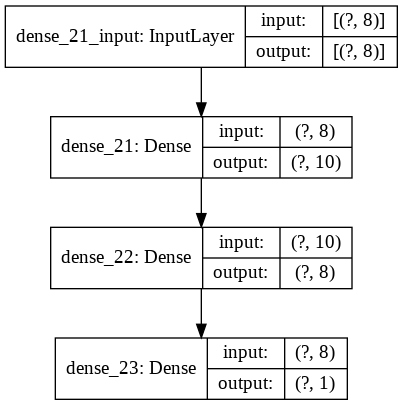

In [42]:
#Architecture Plot

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

# summarize the model
plot_model(model, 'model.png', show_shapes=True)

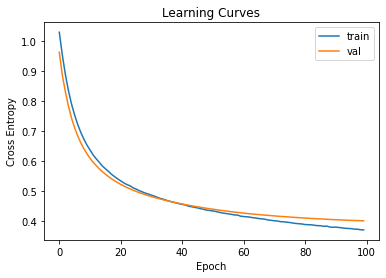

In [43]:
# Plotting the Learning Curve
# Requires fit function that references a validation dataset
# which can be done manually or with validation_split argument
# Fit function will return 'history' object that enables plot

from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

How to Save and load your Model

Employs save() and load_model() functions. Uses H5 format, which requires that h5py library.

In [0]:
# example of saving a fit model

from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

# save model to file
model.save('model.h5')


In [45]:
# Loading saved model

from sklearn.datasets import make_classification
from tensorflow.keras.models import load_model

# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)

# load the model from file
model = load_model('model.h5')

# make a prediction
row = [1.91518414, 1.14995454, -1.52847073, 0.79430654]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat[0])


Predicted: 0.887


### How to Get Better Model Performance

**How to Reduce Overfitting with Dropout**

Dropout is a regularization method that reduces overfitting of the training dataset and makes the model more robust. It's achieved during training, where some number of layer outputs are randomly ignored or 'dropped out.' This has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for inputs.

It can be used with MLP, CNN and RNN models.  The dropout is specified when you define your model.

In [46]:
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# here is the dropout
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

**How to Accelerate Training with Batch Normalization**

Scale and distribution of inputs can impact how easily or quickly a layer is trained. This is why it's a good idea to scale input data prior to modeling with NNM.

Batch normalization is the technique for training very deep neural networks that standardizes inputs for each minin-batch. This stablizes the learning process and reduces the number of epochs that are needed.

You can normalize by adding a batch normalization layer prior to the layer you wish to have standardized inputs.  BN can run with MLP, CNN and RNN models.


In [47]:
# example of batch normalization

from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from matplotlib import pyplot

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
# here's the batching
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

Halting Training at the Right Time with Early Stopping

This involves monitoring the loss on the training dataset and validation dataset. As soon as the loss for the validation set starts showing signs of 'overfitting' the process can be stopped.

Requires a validation dataset. You can then defining EarlyStopping and instruct it on which performance measures to monitor and the number of epochs to observe the overfitting.



In [0]:
# example of using early stopping

from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# determine the number of input features
n_features = X.shape[1]

# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)

# fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0, validation_split=0.3, callbacks=[es])